In [6]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings(경고미표기)
import warnings
warnings.filterwarnings('ignore')

In [7]:
#[Data Read]
# 설문 스키마가 있는 CSV 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.
question = pd.read_csv('data/sulmun/schema.csv')
# # question.shape

# 판다스로 선다형 객관식 문제에 대한 응답을 가져옴
mcq = pd.read_csv('data/sulmun/multipleChoiceResponses.csv',
 encoding="ISO-8859-1", low_memory=False)
# mcq.shape
# print('[question]')
# print(question.head(3))
# print('[mcq]')
# print(mcq.head(3))
# print(mcq.columns)

# 환율계산을 위한 정보 가져오기
rates = pd.read_csv('data/sulmun/conversionRates.csv')
#    Unnamed: 0 originCountry  exchangeRate
# 0           1           USD      1.000000
# 1           2           EUR      1.195826
# 2           3           INR      0.015620
# 3           4           GBP      1.324188
# 4           5           BRL      0.321350
#rates.drop('Unnamed: 0',axis=1,inplace=True)
#[같은 기능]
del rates['Unnamed: 0']
#   originCountry  exchangeRate
# 0           USD      1.000000
# 1           EUR      1.195826
# 2           INR      0.015620
# 3           GBP      1.324188
# 4           BRL      0.321350

# 주관식 응답을 읽어온다.
ff = pd.read_csv('data/sulmun/freeformResponses.csv', encoding="ISO-8859-1", low_memory=False)


In [17]:
#[국가별 응답 수 상위20위 구하기]
con_df = pd.DataFrame(mcq['Country'].value_counts())
# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 칼럼 명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 해준다.
# 우리나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다.
con_df = con_df.reset_index().drop('index', axis=1) #axis=0이거나 생략이면 행삭제, axis=1이면 컬럼삭제
con_df.head(20) #value_counts() 했기 떄문에 응답수기준 상위 20위가 조회됨
# 연령에 대한 정보를 본다.
mcq['Age'].describe()
# sns.distplot(mcq[mcq['Age'] > 0]['Age']) # x = age, y=빈도 (선형그래프+막대그래프) countplot:x = 빈도
#[여러 그래프 한꺼번에 조회]
korea = mcq.loc[mcq['Country']=='South Korea'] #.dropna() : 한컬럼이라도 na이라면 행삭제
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
 norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
 norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')
#[seaborn.barplot]
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
[cf]
sns.barplot('Salary', sal_coun.index, data = sal_coun, palette='RdYlGn')
sns.barplot(data = sal_coun, palette='RdYlGn')
plt.xticks(rotation=30, ha='right') #오른쪽으로 30도 기울기로 라벨을 정함
plt.title('Employment status of the korean')
plt.ylabel('Rate')
# plt.show()

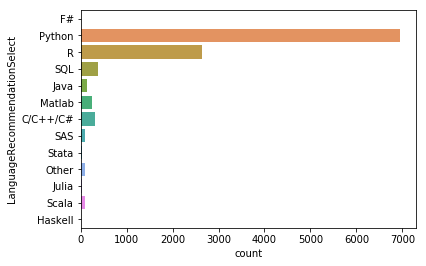

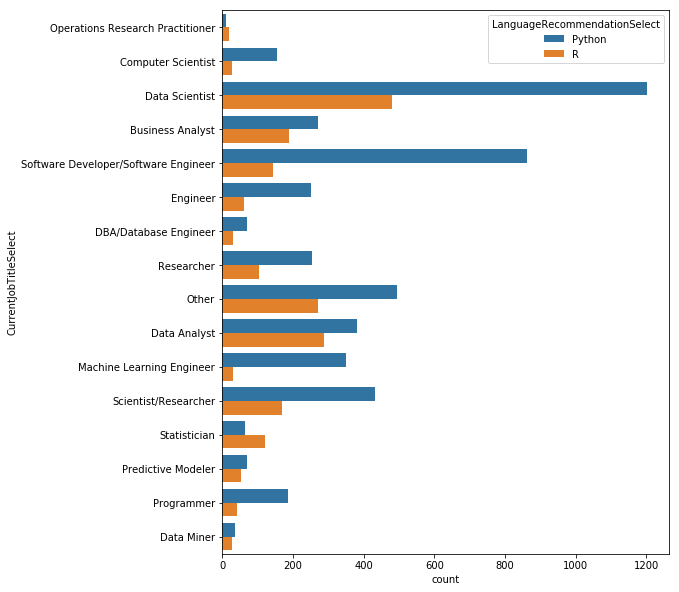

In [32]:
#Python과 R중 어떤 언어를 배워야 할까요?
mcq['LanguageRecommendationSelect'].value_counts() #컬럼값을 구룹핑하여 카운팅 : Series (Python:index  6941:value)
#[어떤 언어를 주로 사용하는가]
# sns.countplot(y='LanguageRecommendationSelect', data=mcq) #y=index, x=value 인 barchart
sns.countplot(y=mcq['LanguageRecommendationSelect'])
# 현재 하는 일에 대한 전체 응답 수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

# 현재 하는 일에 대해 응답을 해준 사람 중 Python과 R을 사용하는 사람
#[응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.]
data = mcq[
    (mcq['CurrentJobTitleSelect'].notnull()) & (
        (mcq['LanguageRecommendationSelect'] == 'Python') | 
        (mcq['LanguageRecommendationSelect'] == 'R')
    )
    ]
plt.figure(figsize=(8, 10))
sns.countplot(y='CurrentJobTitleSelect', #현재직업별(그룹핑) 
 hue='LanguageRecommendationSelect',
 data=data)

Index(['MLToolNextYearSelect'], dtype='object')
<class 'pandas.core.series.Series'>


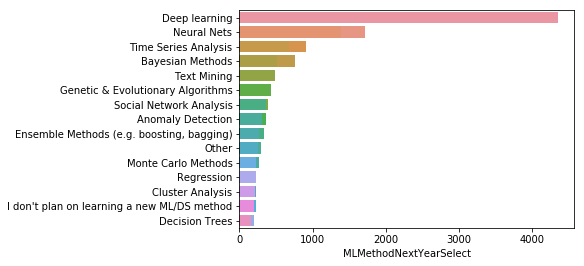

In [6]:
#[내년에 가장 흥미로운 기술은 무엇이라고 생각하나?]
mcq_ml_tool_count = pd.DataFrame(
 mcq['MLToolNextYearSelect'].value_counts())  # 인덱스(기술), 커럼(count)
print(mcq_ml_tool_count.columns) #['MLToolNextYearSelect'] (DF이므로)
mcq_ml_tool_percent = pd.DataFrame(
 mcq['MLToolNextYearSelect'].value_counts(normalize=True)) # 인덱스(기술), 커럼(비율)
mcq_ml_tool_df = mcq_ml_tool_count.merge(
 mcq_ml_tool_percent,
 left_index=True,
 right_index=True).head(20) #인덱스가 같은것끼리 join -> 상위20위
# print(mcq_ml_tool_df.columns) #['MLToolNextYearSelect_x', 'MLToolNextYearSelect_y']
mcq_ml_tool_df.columns = ['응답 수', '비율']
# print(mcq_ml_tool_df.columns) #['응답 수', '비율']
#[ML Tool 중]
data = mcq['MLToolNextYearSelect'].value_counts().head(20)
print(type(data)) #<class 'pandas.core.series.Series'>
sns.barplot(y=data.index, x=data) #Series일때는 column은 없고 index(MLToolNextYearSelect)만 있음
#[ML 방식 중]
data = mcq['MLMethodNextYearSelect'].value_counts().head(15)
sns.barplot(y=data.index, x=data)
#[cf]sns.barplot과 마찬가지로 sns.countplot은 막대그래프이며 df를 대상으로 countplot()으로 해당컬럼을 그룹핑및 카운팅함(but 정렬X)
# df['col'].value_counts() : 해당컬럼으로 그룹핑 및 카운팅 후 정렬 => Serial반환
# sns.countplot(y='MLToolNextYearSelect', 
#  # hue='LanguageRecommendationSelect',
#  data=mcq) # 그룹핑(Y)하여 카운트(X)를 보여주는 그래프이나 순위별로는 보여지지는 않음

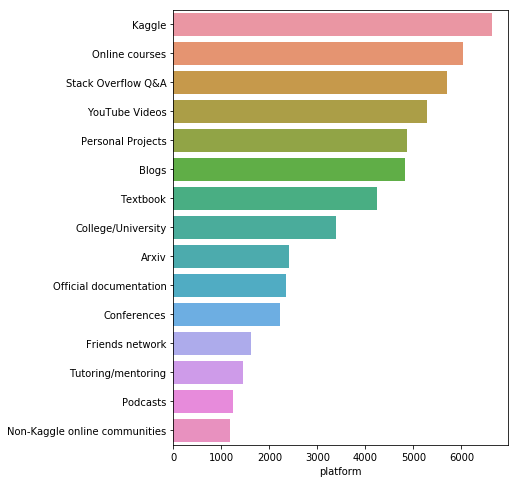

In [7]:
# [쉼표(,)로 연결된 컬럼값을 한줄의 컬럼으로 만들기]
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
# print(mcq['LearningPlatformSelect']) #<class 'pandas.core.series.Series'>
# [['Arxiv',  'College/University',  'Kaggle',  ...
# [['Blogs',  'College/University',  'Conference...
s = mcq.apply(
 lambda x: pd.Series(x['LearningPlatformSelect']),
 axis=1).stack().reset_index(level=1, drop=True) #Series를 한컬럼으로 연결 + index는 level=1하고 reset
# print(s)
# 0                   College/University
# 0                          Conferences
# 0                             Podcasts
# 0                           Trade book
# 1                               Kaggle
# 2                                Arxiv
# 2                   College/University
# 2                               Kaggle
# 2                       Online courses
# 2                       YouTube Videos
# 3                                Blogs
s.name = 'platform'
plt.figure(figsize=(6,8))
data = s[s != 'nan'].value_counts().head(15)#상위15위까지 Serial(index=> 구룹화된값, value=count)
sns.barplot(y=data.index, x=data)

<Figure size 720x720 with 0 Axes>

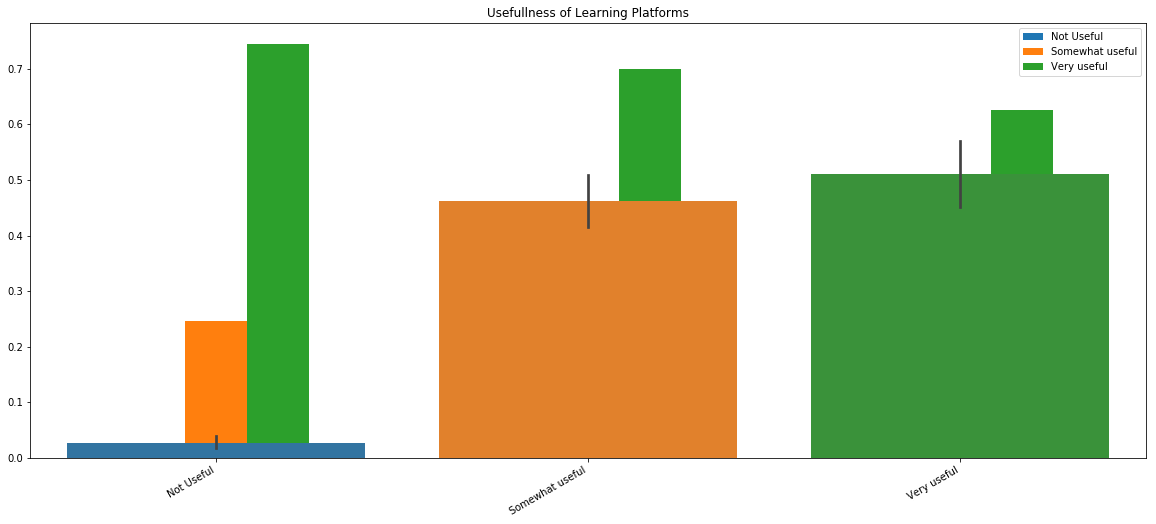

In [5]:
# 설문중 'LearningCategory'를 포함하는 질문DF
qc = question.loc[question[
 'Column'].str.contains('LearningCategory')]
#각 학습플랫폼사용성 컬럼 리스트
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness') != -1] #find:'~' 값을 포함하는 컬럼리스트
# ['LearningPlatformUsefulnessArxiv', 'LearningPlatformUsefulnessBlogs', 
# 'LearningPlatformUsefulnessCollege', 'LearningPlatformUsefulnessCompany',
# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
#[각 학습플랫폼사용성 ]
fdf = {}
for feature in use_features:
     a = mcq[feature].value_counts() #플랫폼사용성 구룹별 카운트
     a = a/a.sum()  #Series일떄는 이렇게 지정해도 됨
     fdf[feature[len('LearningPlatformUsefulness'):]] = a #문자열[:] => 문자split => key(학습플랫폼명) : [사용성별 비율 시리얼]
    # {'Arxiv': Very useful        0.550397
    # Somewhat useful    0.434128
    # Not Useful         0.015475
# print(pd.DataFrame(fdf))
#                     Arxiv     Blogs   College   Company  Conferences  \
# Not Useful       0.015475  0.009444  0.030068  0.041794     0.054537   
# Somewhat useful  0.434128  0.504932  0.418279  0.511723     0.598075   
# Very useful      0.550397  0.485624  0.551652  0.446483     0.347388   
# print(pd.DataFrame(fdf).transpose())
#                Not Useful  Somewhat useful  Very useful
# Arxiv            0.015475         0.434128     0.550397
# Blogs            0.009444         0.504932     0.485624
# College          0.030068         0.418279     0.551652
# Company          0.041794         0.511723     0.446483
fdf = pd.DataFrame(fdf).transpose().sort_values(by='Very useful', ascending=False)
# print(fdf)
#                Not Useful  Somewhat useful  Very useful
# Projects         0.008135         0.247184     0.744681
# Courses          0.007844         0.292056     0.700100
# SO               0.011348         0.362411     0.626241
#
# [heatmap] 플랫폼(y)별 유용성(x)별 값을 확인 
plt.figure(figsize=(10,10))
# sns.heatmap(fdf, annot=True) #heatmap은 df을 그대로 그려준다(y=index, x=col, annot=col_value)
# [barplot] : 각 플랫폼별, 유용성별 빈도수
# 유용함(컬럼)별 값의빈도를 플랫폼별(index)로 알고자 할떄
#(#x=index, y=value, hue=칼럼 : 예:x='project'(플랫폼)에 대해 3개의 컬럼별 막대그래프가 한 캠퍼스에 보여짐
fdf.plot(kind='bar', figsize=(20,8), title="Usefullness of Learning Platforms")
#유용함(컬럼)별 값의 빈도(플랫폼(index) 구분X)를 알고자 할떄
#sns.barplot(data = fdf) #x=col y=value (3개의 막대그래프) 그러나 플랫폼에 대한 정보X
#플랫폼(index)별 특정유용함(컬럼)의 값의 빈도를 알고자 할떄
#sns.barplot(x=fdf.index, y=fdf['Very useful'])
#sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
#sns.barplot('Salary', sal_coun.index, data = sal_coun, palette='RdYlGn')
plt.xticks(rotation=30, ha='right')




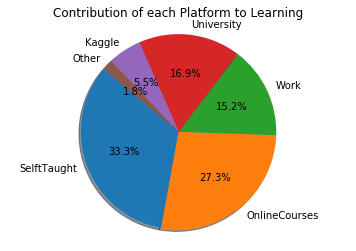

In [99]:
# *Series는 index만 있음:{key:value} =>Series(index:key), {key:[value]}=>DF(col:key)
# * Series의 index를 컬럼으로 바꾸는 방법 : a.transpose()
# * 컬럼명재지정 : a.columns = [], a.rename({})
# plt.pie(Series)
#특정 값을 포함하는 컬럼리스트 도출
cat_features = [x for x in mcq.columns if x.find(
 'LearningCategory') != -1]

# #dictionary(1차원) 만들기 : 한컬럼 전체에 대한 통계값 (컬럼의 그룹핑값에 대한 통계 : pd.pivot_table, df.value_count()...)
# cdf = {}
# for feature in cat_features:
#  cdf[feature[len('LearningCategory'):]] = mcq[feature].mean()
#cdf = {'SelftTaught': 33.36677092074147, 'OnlineCourses': 27.375514246533598, 'Work': 15.217593341468994, 

#[cf] 동일한 방법
a = mcq[cat_features].mean()
a = pd.DataFrame(a)
a = a.transpose() # index가 col이 됨
a.columns = [b[len('LearningCategory'):] for b in a.columns] #컬럼재정의(순서대로 매핑되어 바뀜)

# 파이 차트를 그리기 위해 평균값을 구해와서 담아준다.
cdf = pd.Series(cdf) #{key:value} =>Series(index:key), {key:[value]}=>DF(col:key)
# [plt.pie] 학습 플랫폼별(index) 도움이 되는 정도를 그려본다.
# pie => 데이터 : Series형태 (index:파이의이름 , value:숫자형태) =>ex) value_count()로 만든데이터
#plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()


Basic laptop (Macbook)                                  2246
 Azure                                                   669
Laptop + Cloud service (AWS                              669
 GCE ...)                                                669
Gaming Laptop (Laptop + CUDA capable GPU)                641
Traditional Workstation                                  527
Laptop or Workstation and local IT supported servers     445
GPU accelerated Workstation                              416
Workstation + Cloud service                              174
Other                                                    147
Name: hardware, dtype: int64


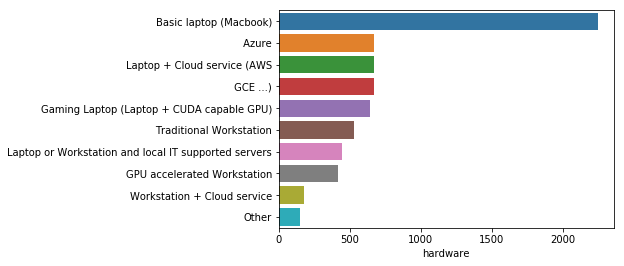

In [11]:
#[데이터 과학을 위해 높은 사양의 컴퓨터가 필요한가요?]
# mcq[mcq['HardwarePersonalProjectsSelect'].notnull()][
#  'HardwarePersonalProjectsSelect'].shape #(4206,)
# 
# mcq['HardwarePersonalProjectsSelect'
#  ] = mcq['HardwarePersonalProjectsSelect'
#  ].astype('str').apply(lambda x: x.split(','))
# s = mcq.apply(lambda x:
#  pd.Series(x['HardwarePersonalProjectsSelect']),
#  axis=1).stack().reset_index(level=1, drop=True)

s.name = 'hardware'
s = s[s != 'nan']
d = s.value_counts()
sns.barplot(y=d.index, x = d.head(10))
print(d.head(10))

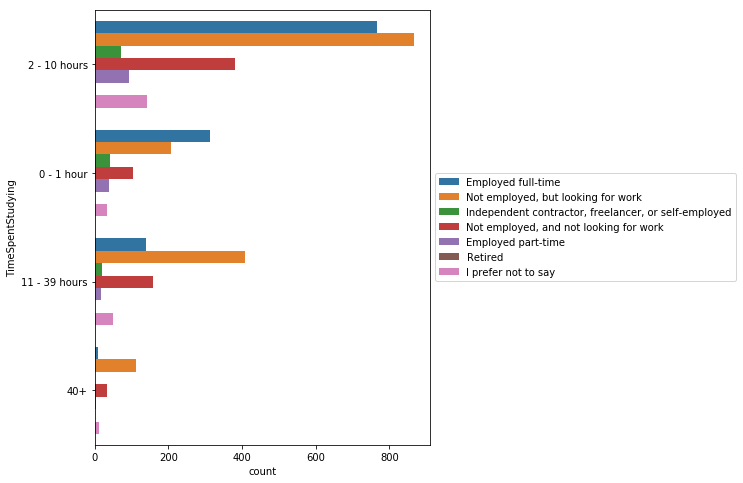

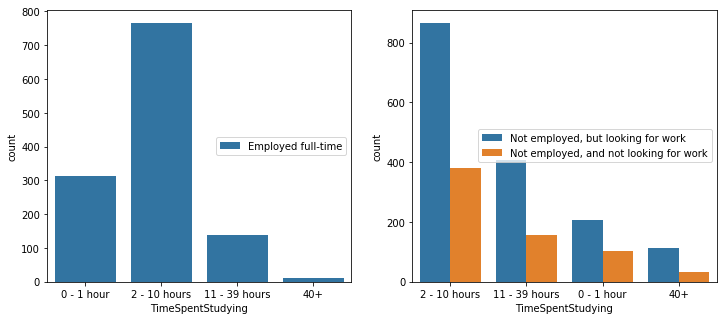

In [16]:
#[데이터 사이언스 공부에 얼마나 많은 시간을 사용하는지?]
plt.figure(figsize=(6, 8))
sns.countplot(y='TimeSpentStudying',
 data=mcq,
 hue='EmploymentStatus'
 ).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#[실업자와 비실업자간 공부시간 비교]
full_time = mcq.loc[mcq['EmploymentStatus']=='Employed full-time']
figure, (ax1, ax2) = plt.subplots(ncols=2)
lst = ['Not employed, but looking for work','Not employed, and not looking for work']
#[특정컬럼이 특정문자를 포함하는 행을 조회하는 방법1]
# looking_for_job = mcq.loc[mcq['EmploymentStatus']=='Not employed, but looking for work']
# looking_for_job2 = mcq.loc[mcq['EmploymentStatus']=='Not employed, and not looking for work']
# looking_for_job = pd.concat([looking_for_job, looking_for_job2])
#[특정컬럼이 특정문자를 포함하는 행을 조회하는 방법2]
# looking_for_job = mcq.loc[mcq['EmploymentStatus'].str.contains('Not employed')] #반드시 str사용해야함
#[특정컬럼이 특정문자를 포함하는 행을 조회하는 방법3]
looking_for_job = mcq.loc[mcq['EmploymentStatus'].str.find ('Not employed') != -1]#반드시 str사용해야함
#[특정컬럼이 특정문자를 포함하는 행을 조회하는 방법4???????????]
# looking_for_job = mcq.loc[mcq['EmploymentStatus'].str in lst]
figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying',
 data=full_time,
 hue='EmploymentStatus', ax=ax1
 ).legend(loc='center right',
 bbox_to_anchor=(1, 0.5))

sns.countplot(x='TimeSpentStudying',
 data=looking_for_job,
 hue='EmploymentStatus', #두타입을 합하려면 제거
 ax=ax2
 ).legend(loc='center right',
 bbox_to_anchor=(1, 0.5))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

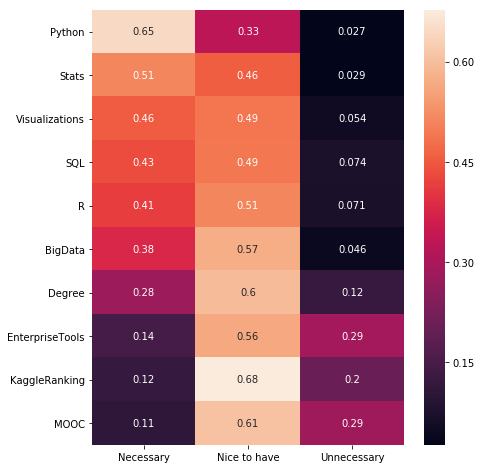

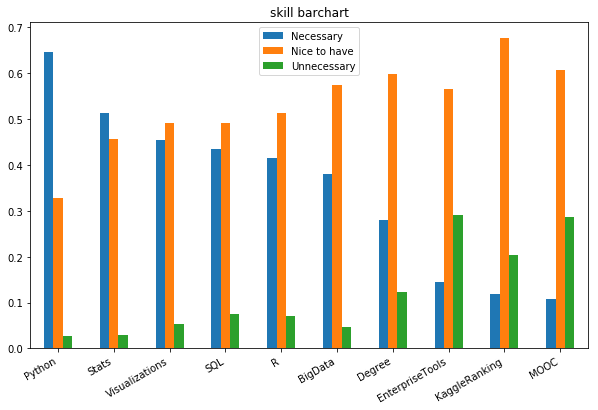

In [28]:
#[데이터 사이언스 직무에서 가장 중요하다고 생각되는 스킬은?]
job_features = [
 x for x in mcq.columns if x.find('JobSkillImportance') != -1 #포함하면서 
 and x.find('JobSkillImportanceOther') == -1] #포함하지않는 컬럼리스트
jdf={}
#컬럼명을 돌면서 스킬이름을 뽑아 dict만들기
for feature in job_features:
    #특성에 대한 유용성 구룹핑카운트 => Series
    a = mcq[feature].value_counts()
    a = a/a.sum() #Series (비중구하기)
    jdf[feature[len('JobSkillImportance'):]] = a #{key:a}

# print(pd.DataFrame(jdf))
#                BigData    Degree     Stats  EnterpriseTools    Python  \
# Necessary     0.379929  0.279867  0.513889         0.144829  0.645994   
# Nice to have  0.574065  0.598107  0.457576         0.564970  0.327214   
# Unnecessary   0.046006  0.122026  0.028535         0.290200  0.026792   
jdf = pd.DataFrame(jdf).transpose().sort_values(by="Necessary", ascending=False ) #필요성의 비중이 가장높은 스킬순으로 정렬
# print(jdf)
#                  Necessary  Nice to have  Unnecessary
# Python            0.645994      0.327214     0.026792
# Stats             0.513889      0.457576     0.028535
# Visualizations    0.455392      0.490820     0.053788

plt.figure(figsize=(7,8))
#[seaborn.heamap]
sns.heatmap(jdf, annot=True)
#[barchart]
jdf.plot(kind="bar", figsize=(10,6), title='skill barchart')
plt.xticks(rotation=30, ha='right')    

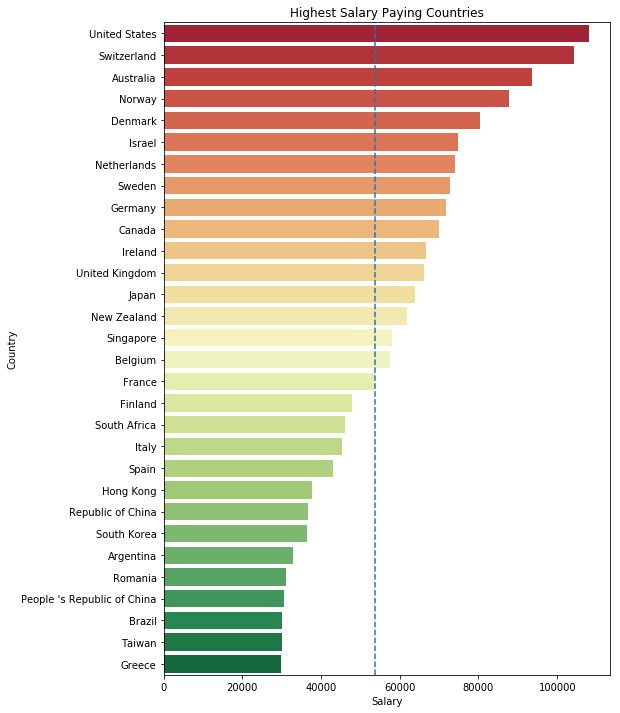

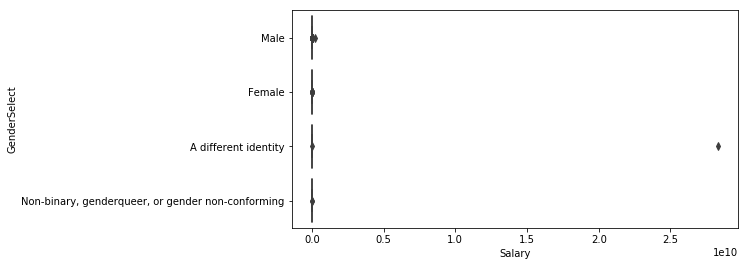

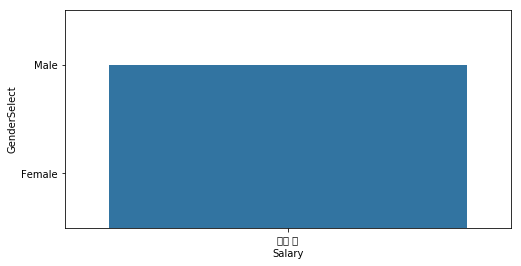

In [91]:
#[데이터 과학자의 평균 급여는 얼마나 될까?]
mcq[mcq['CompensationAmount'].notnull()].shape
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace(',','')
mcq['CompensationAmount'] = mcq['CompensationAmount'].str.replace('-','')
#하나라도 na가 있으면 행 삭제
salary = mcq[
 ['CompensationAmount','CompensationCurrency',
 'GenderSelect',
 'Country',
 'CurrentJobTitleSelect']].dropna()
#급여와 환율 df 조인
salary = salary.merge(rates,left_on='CompensationCurrency',
 right_on='originCountry', how='left')
salary['Salary'] = pd.to_numeric(salary['CompensationAmount']) * salary['exchangeRate']
# print('Maximum Salary is USD $',
#  salary['Salary'].dropna().astype(int).max())
# print('Minimum Salary is USD $',
#  salary['Salary'].dropna().astype(int).min())
# print('Median Salary is USD $',
# salary['Salary'].dropna().astype(int).median())
# print('mean Salary is USD $',
# salary['Salary'].dropna().astype(int).mean())
# Maximum Salary is USD $ 208999999
# Minimum Salary is USD $ -2147483648
# Median Salary is USD $ 53812.0


# plt.subplots(figsize=(15,8))
# salary=salary[salary['Salary']>=500000]
# sns.distplot(salary['Salary'])
# plt.axvline(salary['Salary'].median(), linestyle='dashed')
# plt.title('Salary Distribution',size=15)

plt.subplots(figsize=(8,12))
sal_coun = salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:30].to_frame()
#index : country, col_value='salary'.median() =나라별 급여중위값                     
# Country                         Salary      
# United States                108000.0000
# Switzerland                  104338.2000
# Australia                     93469.1150
# Norway                        87875.4000
# Denmark                       80365.0000
# Israel                        74852.5680
sns.barplot('Salary',
 sal_coun.index,
 data = sal_coun,
 palette='RdYlGn')
plt.axvline(salary['Salary'].median(), linestyle='dashed') #중위값에 점섬을 세로로 그어라
plt.title('Highest Salary Paying Countries')

plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary', data=salary)

salary_korea = salary.loc[(salary['Country']=='South Korea')]
plt.subplots(figsize=(8,4))
sns.boxplot(y='GenderSelect',x='Salary',data=salary_korea)
#(간단히 보기 :df[].describe) [한국 남성의 급여 통계
salary_korea_male = salary_korea.loc[salary_korea['GenderSelect']== 'Male']
salary_korea_male['Salary'].describe()
#(간단히 보기 :df[].value_counts().head() -> df)
# 개인프로젝트에서 공개 된 데이터셋을 다루는 데 가장 어려운 점은 무엇일까?
ppcff = ff['PersonalProjectsChallengeFreeForm'].value_counts().head(15) #Serial
# None                     23
# Cleaning the data        20
# Cleaning                 20
# Dirty data               16
ppcff.name = '응답 수' #seres일경우 컬럼명으로 지정 =>df로 변환시 컬럼이 됨
dat = pd.DataFrame(ppcff).drop(['None','none','-'])
#                       응답 수
# Cleaning the data        20
# Cleaning                 20
# Dirty data               16
# Data Cleaning            14
# Data cleaning            10
sns.barplot(dat.index, '응답 수', data=dat)

#(간단하게 보기)
#[데이터 사이언스 업무에서 가장 많은 시간을 필요로 하는 일은?]
time_features = [i for i in mcq.columns if i.find('Time')!=-1][4:10]
tdf = {}
for features in time_features:
    tdf[features[len('Time'):]] = mcq[features].mean() #{업무명:소요시간평균}

tdf = pd.Series(tdf)
plt.pie(tdf, labels=tdf.index,  #Series
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Percentage of Time Spent on Each DS Job")
plt.show()


tdf.name='time'
sns.barplot(x=tdf.index, y=tdf) #Series

df = pd.DataFrame(tdf)
sns.barplot(df.index, 'time', data=df) #DF

#데이터 사이언티스트가 되기 위해 학위가 중요할까요?
sns.countplot(y='UniversityImportance', data=mcq) #very important


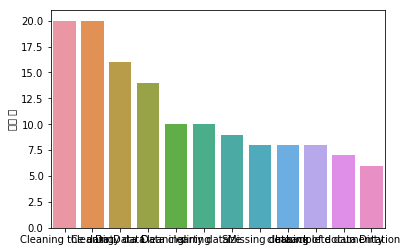

In [94]:
ppcff.name = '응답 수' #seres일경우 컬럼명으로 지정 =>df로 변환시 컬럼이 됨
dat = pd.DataFrame(ppcff).drop(['None','none','-'])
#                       응답 수
# Cleaning the data        20
# Cleaning                 20
# Dirty data               16
# Data Cleaning            14
# Data cleaning            10
sns.barplot(dat.index, '응답 수', data=dat)
sns.barplot(x=dat.index, y=dat['응답 수'])

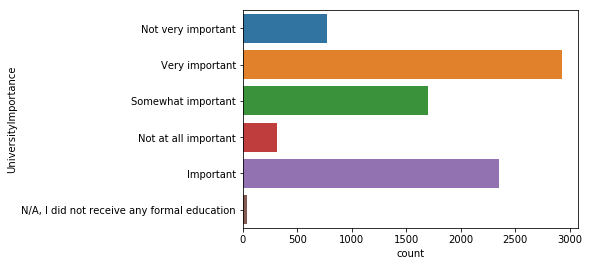